In [ ]:
import networkx as nx  # NetworkX санг ашиглан граф үүсгэх, боловсруулах
import pandas as pd  # Pandas санг өгөгдөл боловсруулах, хүснэгттэй ажиллахад ашиглана
import matplotlib.pyplot as plt  # Matplotlib санг график дүрслэл хийхэд ашиглана
import numpy as np  # NumPy санг тоон өгөгдөл боловсруулахад ашиглана

%matplotlib inline


Энэ код Game of Thrones цувралын 6-р улирлын дүрүүдийн хоорондын харилцааны өгөгдлийг ашиглан граф (network) үүсгэж байна.

In [ ]:
def read_net_w(filename):  # Функц тодорхойлж байна, өгөгдсөн файлын нэрийг параметрээр авна
    g = nx.Graph()  # NetworkX сангийн хоосон граф үүсгэж байна
    with open("/content/got-s6-edges (1).csv") as f:  # Файлыг унших зориулалтаар нээнэ
        f.readline()  # Эхний мөрийг (header) алгасаж байна
        for l in f:  # Файлын мөр бүрийг давталтаар уншина
            l = l.split(",")  # Мөрийг таслалаар (",") салгаж, жагсаалт үүсгэнэ
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Хоёр оролцогч зангилааг холбоод, жинг нь нэмнэ
    return g  # Бүтээсэн графыг буцаана

# Game of Thrones өгөгдөл
season = 6  # 6-р улирлын өгөгдлийг ашиглана
g = read_net_w(f'data/asioaf/got-s{season}-edges.csv')  # Файл уншиж, граф үүсгэнэ


## Bridges and Local Bridges

График гүүртэй эсэхийг шалгаж байна

In [ ]:
nx.has_bridges(g)  # Граф дотор "гүүр" буюу устгахад сүлжээг хоёр хэсэгт хуваах ирмэг байгаа эсэхийг шалгана


True

График дээрх бүх гүүрийг үүсгэж байна

In [ ]:
list(nx.bridges(g))  # Граф доторх "гүүр" болсон ирмэгүүдийг жагсаалтаар буцаана

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

График дахь бүх орон нутгийн гүүрийг үүсгэж, зайг тооцоолох (жишээ нь, хэрэв орон нутгийн гүүрийг устгасан бол төгсгөлийн цэгүүдийн хоорондох хамгийн богино замын урт)

In [ ]:
list(nx.local_bridges(g, with_span=True))  # Граф дахь "орон нутгийн гүүрүүд" болон тэдгээрийн span-ийг жагсаана


[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

## Tie Strength

Хөршүүдийн давхцалаар дамжуулан график дахь хос зангилаа бүрийн зангилаа хүчийг хэмжих

In [ ]:
def node_overlap(g):  # Графын ирмэг бүрийн зангилаануудын хөршүүдийн давхцлыг тооцоолох функц
    for u, v in g.edges():  # Графын бүх ирмэгийг (u, v) хосоор авч давтана
        n_u = set(g.neighbors(u))  # u зангилааны хөршүүдийг багц (set) хэлбэрээр авна
        n_v = set(g.neighbors(v))  # v зангилааны хөршүүдийг багц (set) хэлбэрээр авна
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Давхцсан хөршүүдийн хувь: (нийт хөршүүдийн харьцаа)
        g[u][v]['overlap'] = overlap  # Тухайн ирмэгт "overlap" шинж чанарыг нэмнэ
    return g  # Өгөгдсөн графыг шинэчлэгдсэн байдлаар буцаана

In [ ]:
g = node_overlap(g)

Хөршүүдийн давхцлын KDE (Цөмийн нягтын тооцоо) график

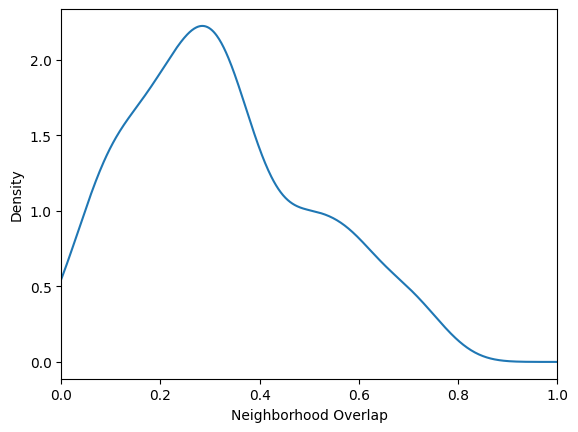

In [ ]:
weights = [e[-1]['overlap'] for e in g.edges(data=True)]  # Бүх ирмэгийн "overlap" утгыг жагсаалтад хадгална
pd.DataFrame(weights)[0].plot.kde()  # Давтамжийн нягтын функц (KDE) ашиглан тархалтын график зурна
plt.xlabel("Neighborhood Overlap")  # X тэнхлэгийн нэрийг тохируулна
plt.xlim(0, 1)  # X тэнхлэгийн хязгаарыг 0-ээс 1 хүртэл тогтооно
plt.show()  # Графикийг дэлгэцэнд харуулна


Харилцан үйлчлэлийн жингийн KDE (Цөмийн нягтын тооцоо) график

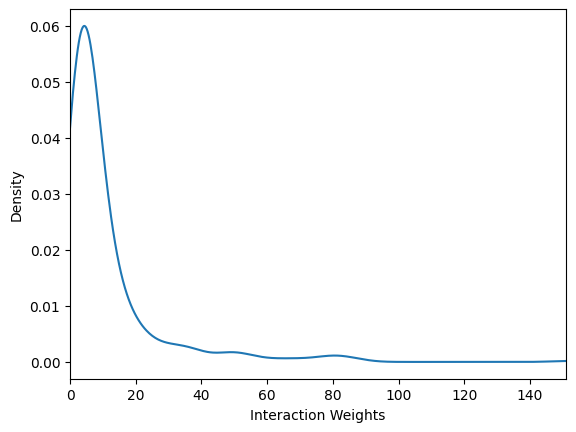

In [ ]:
weights_got = [d['weight'] for u, v, d in g.edges(data=True)]  # Ирмэгүүдийн "weight" утгыг цуглуулна
pd.DataFrame(weights_got)[0].plot.kde()  # Жингүүдийн тархалтыг KDE графикаар дүрслэнэ
plt.xlabel("Interaction Weights")  # X тэнхлэгийн нэрийг "Interaction Weights" гэж өгнө
plt.xlim(0, max(weights_got))  # X тэнхлэгийг 0-ээс жингийн хамгийн их утга хүртэл хязгаарлана
plt.show()  # Графикийг дэлгэцэнд харуулна


## Network Resilience
Дараах тохиолдолд бид:
- Санамсаргүй, масштабгүй сүлжээ үүсгэх
- Хоёр сүлжээний найдвартай байдлыг тооцоолох (molloy_reed болон эвдрэлийн_босгогоор)
- Game of Thrones-ийн график санамсаргүй бүтэлгүйтэл болон зорилтот довтолгоонд тэсвэртэй байдлын графикs

Сүлжээ үүсгэх

In [ ]:
# Random (Эрдөш-Рени загвар)
er = nx.erdos_renyi_graph(1000, 0.001)  # 1000 оройтой, холболтын магадлал 0.001 байх санамсаргүй граф үүсгэнэ

# Scale-free (Барабаши-Альберт загвар)
ba = nx.barabasi_albert_graph(1000, 2)  # 1000 оройтой, шинэ

ER болон BA сүлжээнүүдийн аль алинд нь тооцоолох зангилааны зэрэг

In [ ]:
er_degs = list(dict(er.degree()).values())  # Эрдөш-Рени графын орой бүрийн зэргийн (degree) утгуудыг жагсаана
ba_degs = list(dict(ba.degree()).values())  # Барабаши-Альберт графын орой бүрийн зэргийн (degree) утгуудыг жагсаана

Моллой-Ридийн босгыг тодорхойлох

In [ ]:
def molloy_reed(degrees):
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)

def breakdown_threshold(degrees):
    K = molloy_reed(degrees)
    return 1 - (1 / (K - 1))


Санамсаргүй сүлжээ

In [ ]:
molloy_reed(er_degs)  # Эрдөш-Рени графын Molloy-Reed үзүүлэлтийг тооцоолно


np.float64(1.998)

In [ ]:
breakdown_threshold(er_degs)  # Эрдөш-Рени графын задарлын босго (breakdown threshold)-г тооцоолно


np.float64(-0.002004008016031955)

Хэмжээгүй сүлжээ

In [ ]:
molloy_reed(ba_degs)  # Барабаши-Альберт графын Molloy-Reed үзүүлэлтийг тооцоолно

np.float64(4.992)

In [ ]:
breakdown_threshold(ba_degs)  # Барабаши-Альберт графын задарлын босго утгыг тооцоолно

np.float64(0.7494989979959921)

### Санамсаргүй бүтэлгүйтэл

In [ ]:
def random_node(g):  # Графаас санамсаргүй нэг зангилаа сонгох функц
    return [np.random.choice(g.nodes())]  # Санамсаргүй сонгосон зангилааг массив хэлбэрээр буцаана
def dismantle(g, function, **args):  # Зангилаануудыг аажмаар устгаж, холбогдсон хэсгүүдийн хэмжээг тооцоолох функц
    total_nodes = g.number_of_nodes()  # Граф дахь нийт зангилааны тоог авна
    removed_nodes = []  # Устгасан зангилааны харьцааг хадгалах массив
    components = []  # Хамгийн том холбогдсон хэсгийн хэмжээг хадгалах массив
    while len(g.nodes()) > 1:  # Графын зангилааны тоо 1-ээс их байгаа тохиолдолд давтана
        n = function(g, **args)[0]  # Өгөгдсөн функцийн дагуу устгах зангилааг сонгоно
        g.remove_node(n)  # Сонгосон зангилааг графаас устгана
        removed_nodes.append((len(removed_nodes) + 1) / total_nodes)  # Устгасан зангилааны харьцааг хадгална
        comps = list(nx.connected_components(g))  # Графын холбогдсон хэсгүүдийг олно
        g_size = 0  # Хамгийн том холбогдсон хэсгийн анхны утга
        if len(comps) > 0:  # Хэрэв холбогдсон хэсгүүд байгаа бол
            g_size = max([len(c) for c in comps]) / total_nodes  # Хамгийн том хэсгийн харьцааг тооцоолно
        components.append(g_size)  # Харьцааг хадгална
    return removed_nodes, components  # Устгасан зангилааны хувь болон том хэсгийн хэмжээг буцаана
def get_sorted_nodes(g, score, reverse=True):  # Зангилаануудыг тодорхой үнэлгээгээр эрэмбэлэх функц
    nodes = score(g)  # Өгөгдсөн үнэлгээний функцийг ашиглан зангилаануудын оноог авна
    if isinstance(nodes, dict):  # Хэрэв оноо толь хэлбэртэй бол
        nodes = [(k, v) for k, v in nodes.items()]  # Түүнийг tuple хэлбэрт хувиргана
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  # Оноогоор нь буурч буйгаар (эсвэл өсөхөөр) эрэмбэлнэ
    return [x[0] for x in srt]  # Зангилаануудын жагсаалтыг буцаана
def plot_dismantle(x, y):  # Графаас зангилаануудыг хасах үйл явцыг дүрслэх функц
    plt.plot(x, y)  # X ба Y утгуудыг ашиглан график зурна
    plt.xlabel("Removed Nodes")  # X тэнхлэгийг тэмдэглэх
    plt.ylabel("Giant Component size")  # Y тэнхлэгийг тэмдэглэх
    plt.show()  # Графикийг харуулах


Санамсаргүй бүтэлгүйтэл:
- Их хэмжээний зангилааны хэсгийг арилгахад аварга бүрэлдэхүүн хэсгийн хэмжээ тогтмол буурдаг

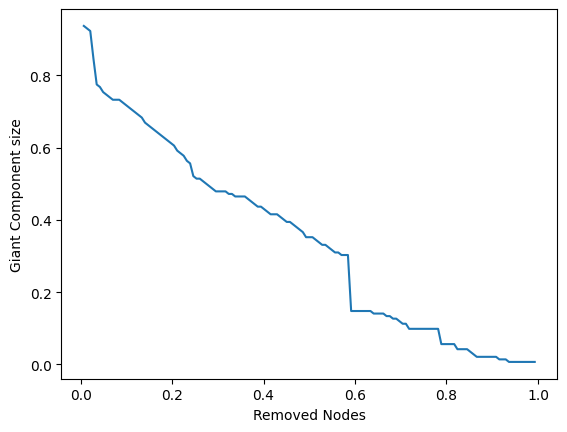

In [ ]:
h = g.copy()  # g графын хувилбарыг h болгон хуулна. Ингэснээр анхны g-г өөрчлөхгүйгээр туршилт хийх боломжтой.
rn, comps = dismantle(h, random_node)  # `dismantle` функцыг ашиглан h графаас зангилаануудыг санамсаргүйгээр устгана.
# `rn` - Устгасан зангилаануудын хувь хэмжээг агуулсан массив.
# `comps` - Граф дахь хамгийн том холбогдсон хэсгийн харьцааны өөрчлөлтийг хадгалах массив.
plot_dismantle(rn, comps)  # Устгалтын явцыг дүрслэх график зурах.

### Зорилтот халдлага

Зорилтот зангилааны халдлага (эхлээд төвийг устгана)
- Асар том бүрэлдэхүүн хэсгийн хэмжээ нь зангилааны багахан хэсгийг арилгахад тогтмол буурдаг

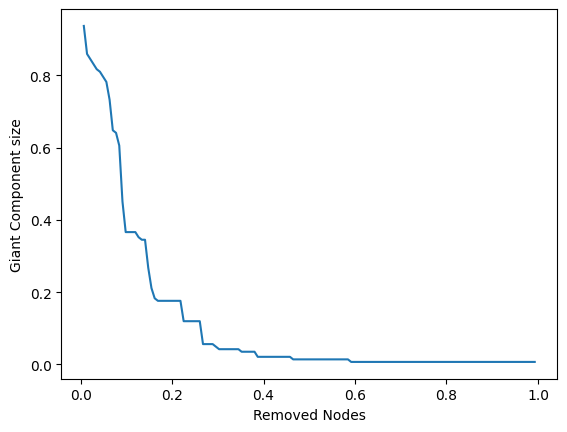

In [ ]:
h = g.copy()  # Анхны графыг өөрчлөхгүй байхын тулд хувилбар үүсгэнэ.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
# `nx.degree`-ээр зангилаануудыг эрэмбэлж, хамгийн олон холболттойг нь эхэлж устгана.
plot_dismantle(rn, comps)  # Устгалтын явцыг графикаар дүрслэнэ.


Targeted Edge Attack (Edge Betweenness Centrality дээр суурилсан)
- Асар том бүрэлдэхүүн хэсгийн хэмжээ нь зангилааны багахан хэсгийг арилгахад тогтмол буурдаг

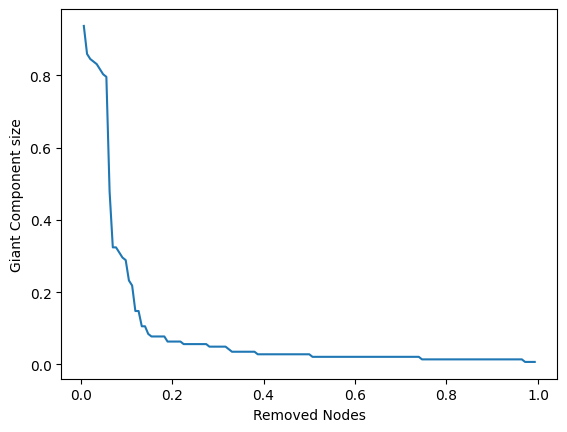

In [ ]:
h = g.copy()  # Анхны графыг өөрчлөхгүйн тулд хуулбар үүсгэнэ.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
# `nx.betweenness_centrality`-г ашиглан зангилаануудыг эрэмбэлнэ.
# Энэ нь олон зам дамждаг чухал зангилаануудыг эхэлж устгах стратеги юм.
plot_dismantle(rn, comps)  # Устгалтын явцыг графикаар дүрслэнэ.


Targeted Edge Attack (based on Edge Harmonic Centrality)
- Giant component size has a consistent decrease when a small fraction of nodes is removed

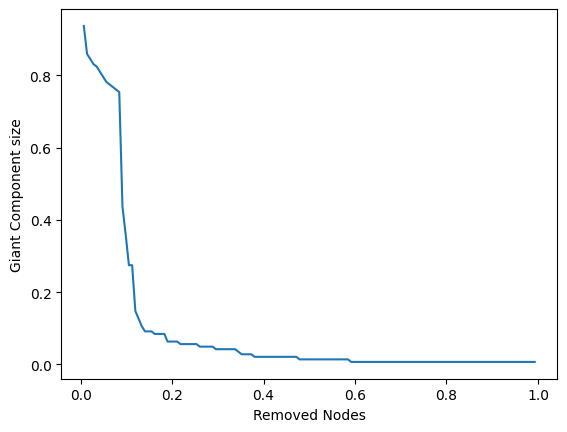

In [ ]:
h = g.copy()  # Анхны графыг өөрчлөхгүйн тулд хуулбар үүсгэнэ.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)
# `nx.harmonic_centrality` ашиглан зангилаануудыг эрэмбэлж, хамгийн өндөр төвлөрөлтэйг нь эхэлж устгана.
plot_dismantle(rn, comps)  # Устгалтын явцыг графикаар дүрслэнэ.
